In [5]:
import pandas as pd

# Daten einlesen
# Destatis_Schutzsuchende_12531-0023 
# ACHTUNG: Ländergruppierungen_Label 'insgesamt' sind die korrekten Werte. Die Ländergruppierungen überschneiden sich.
url = "https://raw.githubusercontent.com/Antonijatzele/DSI_Abschlussprojekt/refs/heads/main/Daten/Destatis_Schutzsuchende_12531-0023_aufbereitet.csv"
df = pd.read_csv(url)

df.head()

,Stichtag,Bundesland_Code,Bundesland,Alter,Ländergruppierungen_Code,Ländergruppierungen_Label,Migrantengeneration,Geschlecht,Anzahl,Schutzsuchende
0,2023-12-31,3,Niedersachsen,65-Jährige,LDR-GASTARB,Gastarbeiterländer,1. Generation (Geburt im Ausland),männlich,110,Schutzsuchende
1,2023-12-31,5,Nordrhein-Westfalen,43-Jährige,DRITT-EU-28,Drittstaaten zu EU-28 (bis 31.01.2020),2. Generation (Geburt in Deutschland),weiblich,10,Schutzsuchende
2,2023-12-31,11,Berlin,11-Jährige,LDR-GASTARB,Gastarbeiterländer,1. Generation (Geburt im Ausland),männlich,80,Schutzsuchende
3,2023-12-31,5,Nordrhein-Westfalen,68-Jährige,DRITT-EU-27,Drittstaaten zu EU-27 (bis 30.06.2013),2. Generation (Geburt in Deutschland),männlich,10,Schutzsuchende
4,2023-12-31,10,Saarland,12-Jährige,DRITT-EU-27-1,Drittstaaten zu EU-27 (seit 01.02.2020),1. Generation (Geburt im Ausland),männlich,485,Schutzsuchende


In [6]:
df.nunique()

Stichtag                       1
Bundesland_Code               16
Bundesland                    16
Alter                         96
Ländergruppierungen_Code      37
Ländergruppierungen_Label     38
Migrantengeneration            2
Geschlecht                     2
Anzahl                       850
Schutzsuchende                 1
dtype: int64

In [7]:
# Länderguppierungen_code ist dort null wo Ländergruppierungen_label = 'Insgesamt'
df.isnull().sum()

Stichtag                        0
Bundesland_Code                 0
Bundesland                      0
Alter                           0
Ländergruppierungen_Code     4372
Ländergruppierungen_Label       0
Migrantengeneration             0
Geschlecht                      0
Anzahl                          0
Schutzsuchende                  0
dtype: int64

In [8]:
# Erstellen der neuen Spalte 'Migrantengeneration_Code'
df['Migrantengeneration_Code'] = df['Migrantengeneration'].map({
    "2. Generation (Geburt in Deutschland)": 2,
    "1. Generation (Geburt im Ausland)": 1
})

In [9]:
schutzsuchende_gesamt = df[df["Ländergruppierungen_Label"] == "Insgesamt"]

schutzsuchende_gesamt.head()

,Stichtag,Bundesland_Code,Bundesland,Alter,Ländergruppierungen_Code,Ländergruppierungen_Label,Migrantengeneration,Geschlecht,Anzahl,Schutzsuchende,Migrantengeneration_Code
6,2023-12-31,10,Saarland,1-Jährige,NaN,Insgesamt,2. Generation (Geburt in Deutschland),männlich,215,Schutzsuchende,2
33,2023-12-31,12,Brandenburg,30-Jährige,NaN,Insgesamt,2. Generation (Geburt in Deutschland),männlich,5,Schutzsuchende,2
81,2023-12-31,5,Nordrhein-Westfalen,1-Jährige,NaN,Insgesamt,2. Generation (Geburt in Deutschland),männlich,3245,Schutzsuchende,2
105,2023-12-31,8,Baden-Württemberg,56-Jährige,NaN,Insgesamt,1. Generation (Geburt im Ausland),weiblich,1440,Schutzsuchende,1
118,2023-12-31,15,Sachsen-Anhalt,85-Jährige,NaN,Insgesamt,1. Generation (Geburt im Ausland),weiblich,45,Schutzsuchende,1


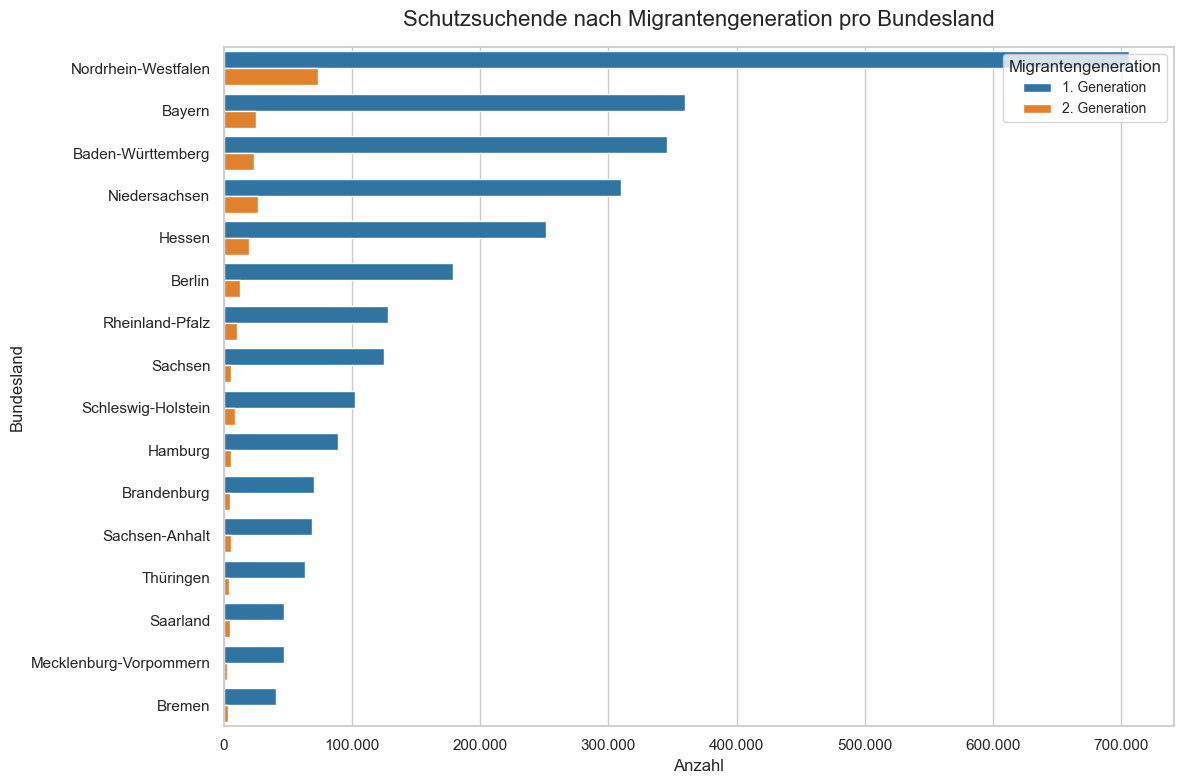

In [12]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Seaborn-Stil aktivieren
sns.set(style="whitegrid")

# Gruppieren und Pivotieren
bundesland_migration = schutzsuchende_gesamt.groupby(
    ["Bundesland", "Migrantengeneration_Code"]
)["Anzahl"].sum().reset_index()

# Optional: Mapping der Codes zu Klartext
generation_map = {1: "1. Generation", 2: "2. Generation"}
bundesland_migration["Migrantengeneration"] = bundesland_migration["Migrantengeneration_Code"].map(generation_map)

# Gesamtsumme pro Bundesland zur Sortierung berechnen
sum_by_bundesland = bundesland_migration.groupby("Bundesland")["Anzahl"].sum().sort_values(ascending=False)
sorted_bundeslaender = sum_by_bundesland.index.tolist()

# Balkendiagramm
plt.figure(figsize=(12, 8))
ax = sns.barplot(
    data=bundesland_migration,
    y="Bundesland",
    x="Anzahl",
    hue="Migrantengeneration",
    order=sorted_bundeslaender,
    palette=["#1f77b4", "#ff7f0e"]
)

# Titel & Achsen
plt.title("Schutzsuchende nach Migrantengeneration pro Bundesland", fontsize=16, pad=15)
plt.xlabel("Anzahl", fontsize=12)
plt.ylabel("Bundesland", fontsize=12)

# X-Achse mit Punkt als Tausender-Trennzeichen
from matplotlib.ticker import FuncFormatter
ax.xaxis.set_major_formatter(FuncFormatter(lambda x, _: f"{int(x):,}".replace(",", ".")))

# Legende
plt.legend(title="Migrantengeneration", title_fontsize=12, fontsize=10, loc="upper right")

# Layout verbessern
plt.tight_layout()
plt.show()

In [ ]:
# Schutzsuchende nach Ländergruppen
